# CPA 01 
Angelo Cataldo

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Reading the data !
This data contains a list of video games that sold over 100 thousand copies

In [3]:
gf = pd.read_csv('vgsales.csv')
# This data set was obtained from https://www.kaggle.com/gregorut/videogamesales
gf['Year'] = gf['Year'].fillna(-1).astype(int)
gf.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
gf.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.630980,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.473511,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# What years does this data set contain?

In [5]:
years = sorted(gf['Year'].unique())
print('This data set takes video games published in the years', int(years[0]), 'to', int(years[len(years)-1]))

This data set takes video games published in the years -1 to 2020


# What platforms have the most total sales

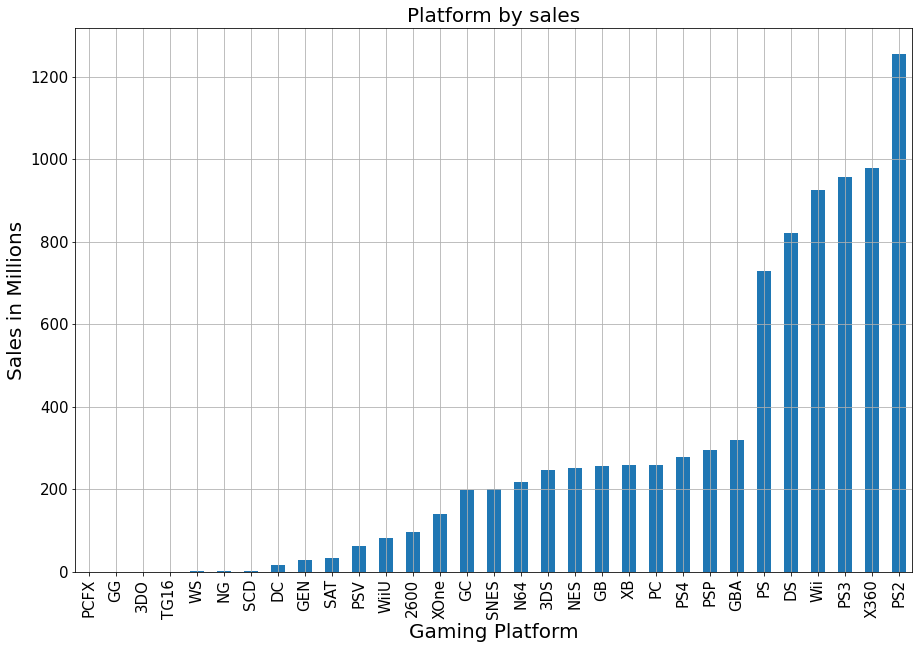

In [6]:
totalSalesByPlatform = gf.groupby('Platform')['Global_Sales'].sum()
totalSalesByPlatform = totalSalesByPlatform.sort_values(ascending=True)
totalSalesByPlatform.plot(kind="bar", figsize=(15,10))
plt.xlabel("Gaming Platform", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Platform by sales", fontsize=20)
plt.grid()

The golden era seems to be that which consisted of the Playstation, Nintendo DS, Nintendo Wii, Playstation 3, Xbox 360, and Playstation 2. These platforms all released from 1994-2006. Maybe after that era, the freshness and innovation of gaming diminished reducing the market to a more niche one.<br> </br>
Most notably, the Playstation 2 is the clear frontrunner which came out in 2000 and was replaced by the Playstation 3 in 2006.

# Sales by the Year

In [14]:
totalSalesByYear = gf.groupby('Year')['Global_Sales'].sum()
totalSalesByYear = totalSalesByYear.drop(-1)
totalSalesByYear
# totalSalesByYear.plot(kind="bar", figsize=(15,10))
# plt.xlabel("Year",fontsize=20)
# plt.xticks(fontsize=15)
# plt.ylabel("Sales in Millions", fontsize=20)
# plt.yticks(fontsize=15)
# plt.title("Year by sales", fontsize=20)
# plt.grid()

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    419.31
2005    459.94
2006    521.04
2007    611.13
2008    678.90
2009    667.30
2010    600.45
2011    515.99
2012    363.54
2013    368.11
2014    337.05
2015    264.44
2016     70.93
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64